4000
149


<IPython.core.display.Javascript object>


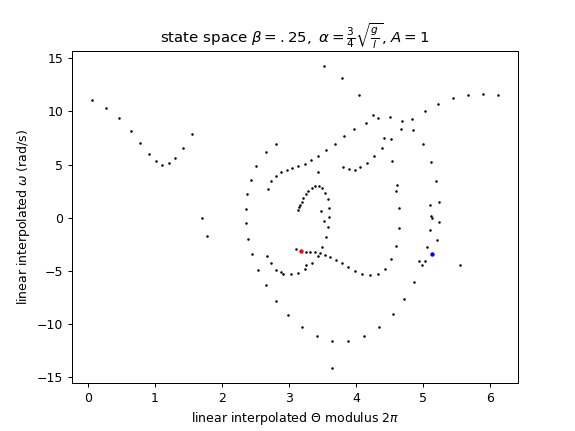

0.135


In [6]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt

theta_values = []
omega_values = []
new_theta_values = []
new_omega_values = []

#runge kutta 4th order

# theta dot
def f(t, theta, omega):
    return omega

# theta double dot
def g(t, omega, theta):

    B = 0.25
    l = 0.1
    m = 0.1
    grav = 9.8
    A = 1
    alpha = 12 / 16 * np.sqrt(grav/l)
    return 1 / (m * l) * (-B * l * omega - m * grav * np.sin (theta) + A * np.cos (alpha * t))
      
def rk4(t0, theta0, omega0, steps, dt, n):
    t = t0
    theta = theta0
    omega = omega0
    count = 0
    count2 = 0
    
    while 1500 > count2 and t < 200:
        
        k = (t-dt)/n
        

        if round(k, 4) - round(k) == 0.0 :  
            theta_values.append(theta)
            omega_values.append(omega)
            count2 += 1
        
        k1 = f(t, theta, omega)
        l1 = g(t, omega, theta)
        
        k2 = f(t + dt / 2, theta + k1 * dt / 2, omega + l1 * dt / 2)
        l2 = g(t + dt / 2, omega + l1 * dt / 2, theta + k1 * dt / 2)
        
        k3 = f(t + dt / 2, theta + k2 * dt / 2, omega + l2 * dt / 2)
        l3 = g(t + dt / 2, omega + l2 * dt / 2, theta + k2 * dt / 2)
        
        k4 = f(t + dt, theta + k3 * dt, omega + l3 * dt)
        l4 = g(t + dt, omega + l3 * dt, theta + k3 * dt)
        
        theta = theta + dt / 6 * (k1 + 2 * k2 + 2 * k3 + k4)
        omega = omega + dt / 6 * (l1 + 2 * l2 + 2 * l3 + l4)

        count += 1
        t += dt
    
    print(count)
    print(count2)
    
    for i in range(len(theta_values) - 1):
        new_theta_values.append(theta_values[i] + (theta_values[i+1] - theta_values[i]) / 2)
        new_omega_values.append(omega_values[i] + (omega_values[i+1] - omega_values[i]) / 2)
    for i in range(len(new_theta_values)):
        new_theta_values[i] = new_theta_values[i]%(2*3.14)    

        
    plt.plot(new_theta_values,new_omega_values,'k.',markersize=2)
    plt.plot(new_theta_values[20],new_omega_values[20],'r.',markersize=5)
    plt.plot(new_theta_values[21],new_omega_values[21],'b.',markersize=5)

    
    plt.title('state space $\\beta = .25,$ $\\alpha = \\frac{3}{4}\sqrt{\\frac{g}{l}}$, $A = 1$')
    plt.xlabel('linear interpolated $\Theta$ modulus $2\pi$')
    plt.ylabel('linear interpolated $\omega$ (rad/s)')
    plt.savefig('Q2a_c.png')
    

        
t0 = 0
steps = 10000
theta0 = 3.0
omega0 = 0.1
dt = .05

l = 0.1
grav = 9.8
alpha = 12 / 16 * np.sqrt(grav/l)
n = round(1 / alpha,3)

theta0_list = [0.1, np.pi/4, np.pi/2, 3/4*np.pi, np.pi-.1, np.pi+.1, 5/4*np.pi, 3/2*np.pi, 7/4*np.pi, 2*np.pi-.1, 
               -np.pi, -np.pi, 3*np.pi, 3*np.pi] 
omega0_list = [ 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 13, 20, -13, -20]
#for i in range(len(theta0_list)):
#        rk4(t0, theta0_list[i], omega0_list[i], steps, dt, n)

rk4(t0, theta0_list[5], omega0_list[5], steps, dt,n)
print(n)

<IPython.core.display.Javascript object>


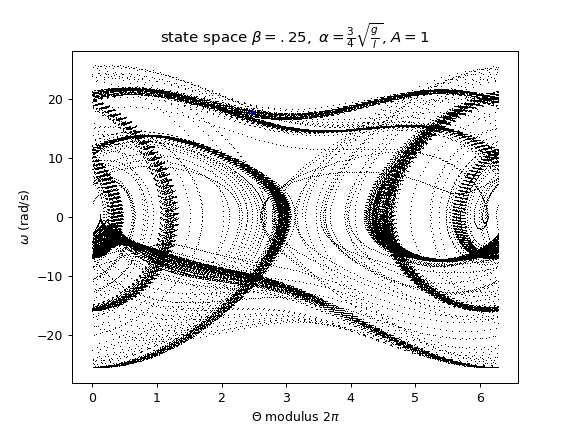

In [11]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt

theta_values = []
omega_values = []

#runge kutta 4th order

# theta dot
def f(t, theta, omega):
    return omega

# theta double dot
def g(t, omega, theta):

    B = 0.25
    l = 0.1
    m = 0.1
    grav = 9.8
    A = 1
    alpha = 12 / 16 * np.sqrt(grav/l)
    return 1 / (m * l) * (-B * l * omega - m * grav * np.sin (theta) + A * np.cos (alpha * t))
      
def rk4(t0, theta0, omega0, steps, dt):
    t = t0
    theta = theta0
    omega = omega0
    count = 0
    
    while steps > count:
        
        theta_values.append(theta)
        omega_values.append(omega)
        
        k1 = f(t, theta, omega)
        l1 = g(t, omega, theta)
        
        k2 = f(t + dt / 2, theta + k1 * dt / 2, omega + l1 * dt / 2)
        l2 = g(t + dt / 2, omega + l1 * dt / 2, theta + k1 * dt / 2)
        
        k3 = f(t + dt / 2, theta + k2 * dt / 2, omega + l2 * dt / 2)
        l3 = g(t + dt / 2, omega + l2 * dt / 2, theta + k2 * dt / 2)
        
        k4 = f(t + dt, theta + k3 * dt, omega + l3 * dt)
        l4 = g(t + dt, omega + l3 * dt, theta + k3 * dt)
        
        theta = theta + dt / 6 * (k1 + 2 * k2 + 2 * k3 + k4)
        omega = omega + dt / 6 * (l1 + 2 * l2 + 2 * l3 + l4)
        

        count += 1
        t += dt
        
    for i in range(len(theta_values)):
        theta_values[i] = theta_values[i]%(2*3.14)
        
    plt.plot(theta_values,omega_values,'k,')
    plt.plot(theta_values[200],omega_values[200],'r.',markersize=5)
    plt.plot(theta_values[201],omega_values[201],'b.',markersize=5)

    plt.title('state space $\\beta = .25,$ $\\alpha = \\frac{3}{4}\sqrt{\\frac{g}{l}}$, $A = 1$')
    plt.xlabel('$\Theta$ modulus $2\pi$')
    plt.ylabel('$\omega$ (rad/s)')
    plt.savefig('Q6.png')

    
dt = .005        
t0 = 0
steps = 50000
theta0 = 3.0
omega0 = 0.1
theta0_list = [0.1, np.pi/4, np.pi/2, 3/4*np.pi, np.pi-.1, np.pi+.1, 5/4*np.pi, 3/2*np.pi, 7/4*np.pi, 2*np.pi-.1, 
               -np.pi, -np.pi, 3*np.pi, 3*np.pi] 

omega0_list = [ 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 13, 20, -13, -20]
rk4(t0, theta0_list[5], omega0_list[5], steps, dt)